[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Primeras filas del DataFrame:
                                               title  \
0  Facebook page of the local branch of a politic...   
1  Cyber attack on a construction company in Germany   
2        Cyber attack on a city government in France   
3  Cyber attack on a traffic management system in...   
4  Mail account of a city government in Belgium h...   

                                         description  \
0   SPÖ Müllendorf - Müllendorf, Burgenland, Austria   
1  Max Wild GmbH - Berkheim, Baden-Württemberg, G...   
2  Ville de Gravelines - Gravelines, Hauts-de-Fra...   
3  KC Scout - Kansas City, Missouri, USA (Jackson...   
4                    Deinze, Flemish Region, Belgium   

                                     title_extracted site_name_extracted  \
0  Hackerangriff auf Facebookseite der SPÖ Müllen...       meinbezirk.at   
1                     Cyberangriff auf Max Wild GmbH         maxwild.com   
2  Notre ville est actuellement victime d’une cyb...        facebook

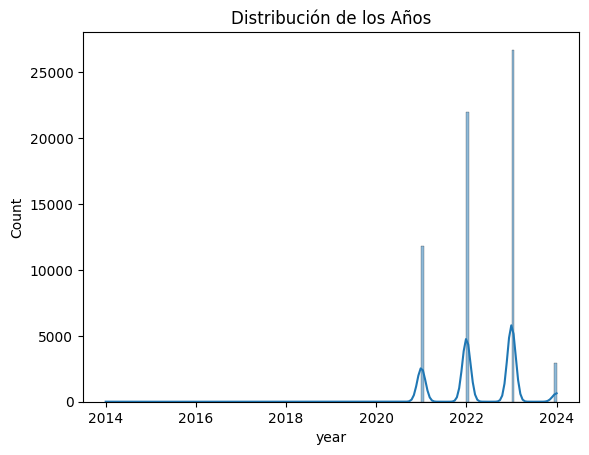

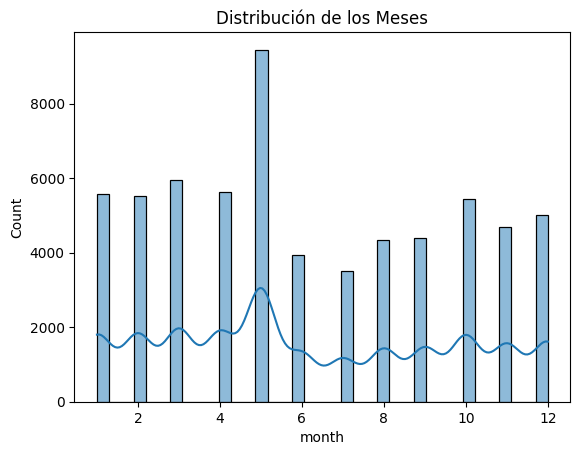

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Descargar recursos de NLTK si no están descargados
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el archivo CSV
df = pd.read_csv('../data/KONBRIEFING_cleaned.csv')

# Mostrar las primeras filas para entender la estructura de los datos
print("Primeras filas del DataFrame:")
print(df.head())

# Revisar valores nulos
missing_data = df.isnull().sum()
print("\nValores nulos por columna:")
print(missing_data)

# Eliminar columnas con muchos valores nulos o si no son necesarias
df = df.dropna(axis=1, thresh=int(0.5 * len(df)))

# Limpiar texto en las columnas 'title' y 'description'
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Verificar si el valor es una cadena de texto
        words = text.lower().split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        return ' '.join(words)
    return text  # Devuelve el valor original si no es una cadena

df['title_cleaned'] = df['title'].apply(clean_text)
df['description_cleaned'] = df['description'].apply(clean_text)

# Convertir variables categóricas en numéricas si es necesario
le = LabelEncoder()
df['sector_encoded'] = le.fit_transform(df['sector'].astype(str))

# Visualización de la distribución de datos numéricos
sns.histplot(df['year'], kde=True)
plt.title('Distribución de los Años')
plt.show()

sns.histplot(df['month'], kde=True)
plt.title('Distribución de los Meses')
plt.show()


               year         month  attack_type_mapping  sector_mapping  \
count  63453.000000  63453.000000         63453.000000    63453.000000   
mean    2022.325438      6.190850             5.311427       12.006241   
std        0.837595      3.451903             2.339781        4.268257   
min     2014.000000      1.000000             0.000000        0.000000   
25%     2022.000000      3.000000             3.000000       13.000000   
50%     2022.000000      5.000000             7.000000       13.000000   
75%     2023.000000      9.000000             7.000000       15.000000   
max     2024.000000     12.000000             8.000000       15.000000   

             Africa          Asia        Europe  North America       Oceania  \
count  63453.000000  63453.000000  63453.000000   63453.000000  63453.000000   
mean       0.012466      0.068035      0.495091       0.309505      0.033395   
std        0.110954      0.251807      0.499980       0.462293      0.179667   
min        0.

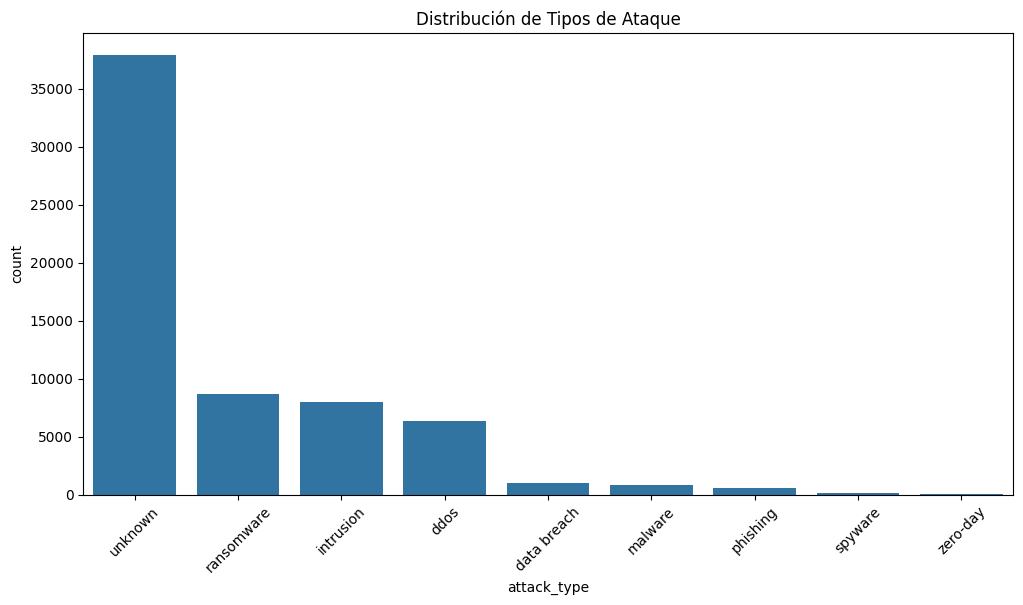

In [8]:
# Estadísticas descriptivas de las columnas numéricas
print(df.describe())

# Estadísticas de las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'{col} - Frecuencia de categorías:')
    print(df[col].value_counts())
    print('\n')

# Visualización de la distribución de las categorías
plt.figure(figsize=(12,6))
sns.countplot(x='attack_type', data=df, order=df['attack_type'].value_counts().index)
plt.title('Distribución de Tipos de Ataque')
plt.xticks(rotation=45)
plt.show()

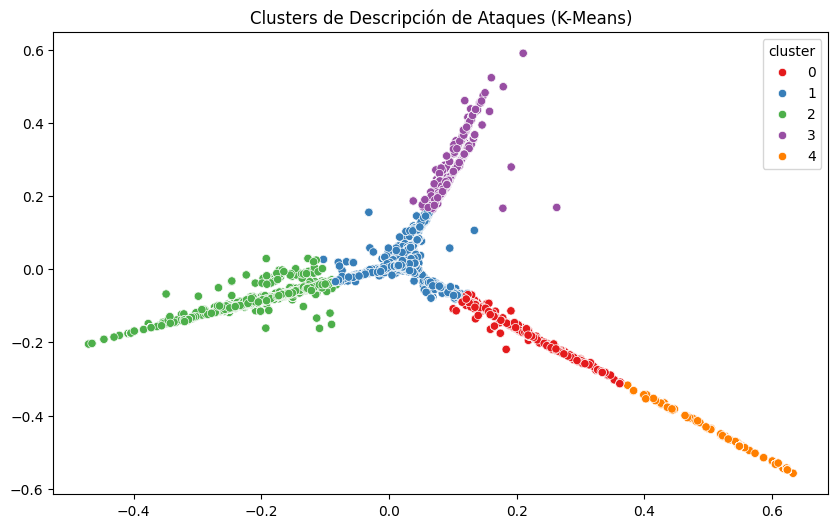

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Usaremos el TF-IDF para convertir los textos en vectores
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['description_cleaned'])

# Reducir la dimensionalidad con PCA para visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

# Visualización de los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1')
plt.title('Clusters de Descripción de Ataques (K-Means)')
plt.show()

Accuracy: 0.6179344400084051
Reporte de clasificación:


C:\Users\miser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

 data breach       0.80      0.15      0.25       295
        ddos       0.57      0.09      0.16      1870
   intrusion       0.54      0.08      0.15      2401
     malware       1.00      0.03      0.05       266
    phishing       0.50      0.09      0.15       166
  ransomware       0.41      0.16      0.23      2571
     spyware       0.00      0.00      0.00        42
     unknown       0.63      0.96      0.76     11416
    zero-day       1.00      0.56      0.71         9

    accuracy                           0.62     19036
   macro avg       0.60      0.23      0.27     19036
weighted avg       0.59      0.62      0.53     19036



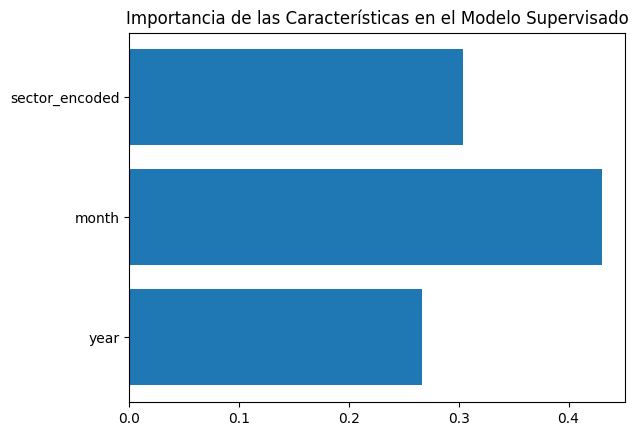

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparamos los datos para el modelo supervisado
X = df[['year', 'month', 'sector_encoded']]  # Características (se pueden agregar más columnas si es necesario)
y = df['attack_type']  # Target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Visualizar la importancia de las características
feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.title('Importancia de las Características en el Modelo Supervisado')
plt.show()